In [1]:
import sys
sys.path.append("../../data")
sys.path.append("../jobnet")
import json
import spacy
import pandas as pd
from preprocessing import substitute_letter, clean_text, remove_html_commands, rm_stops, collect_nn_adj
from polyglot.detect import Detector
from load import get_files

[nltk_data] Downloading package punkt to /home/kate/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df = pd.read_pickle('../../data/pkl/dataset.pkl')
df.head()

,cleaned_description,nn_adj_lemmas
0,job nr unisport har travlt og vi soeger derfor...,"[job, nr, unisport, medarbejder, lage, alberts..."
1,om jobbetpaedagog paedagogmedhjaelper og stoet...,"[jobbetpaedagog, paedagogmedhjaelper, paedagog..."
2,dragoer musik og kulturskole mangler en fantas...,"[dragoer, musik, kulturskole, fantastisk, opst..."
3,vil du arbejde med frit valg udbud og indkoeb ...,"[fritte, valg, udbud, indkoeb, koebenhavns, ko..."
4,rosenlund plejeboliger unikahuset soeger faste...,"[plejebolig, unikahuset, faste, weekend, afloe..."


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text


vectorizer = TfidfVectorizer(lowercase=False,
                             tokenizer=identity_tokenizer, 
                             ngram_range = (1,1)
                             )
vectors = vectorizer.fit_transform(df['nn_adj_lemmas'])


In [6]:
tfidf_weights = [(word, vectors.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=3000, height=2000, random_state = 1, background_color='white', colormap="inferno", collocations = False).fit_words(dict(tfidf_weights))

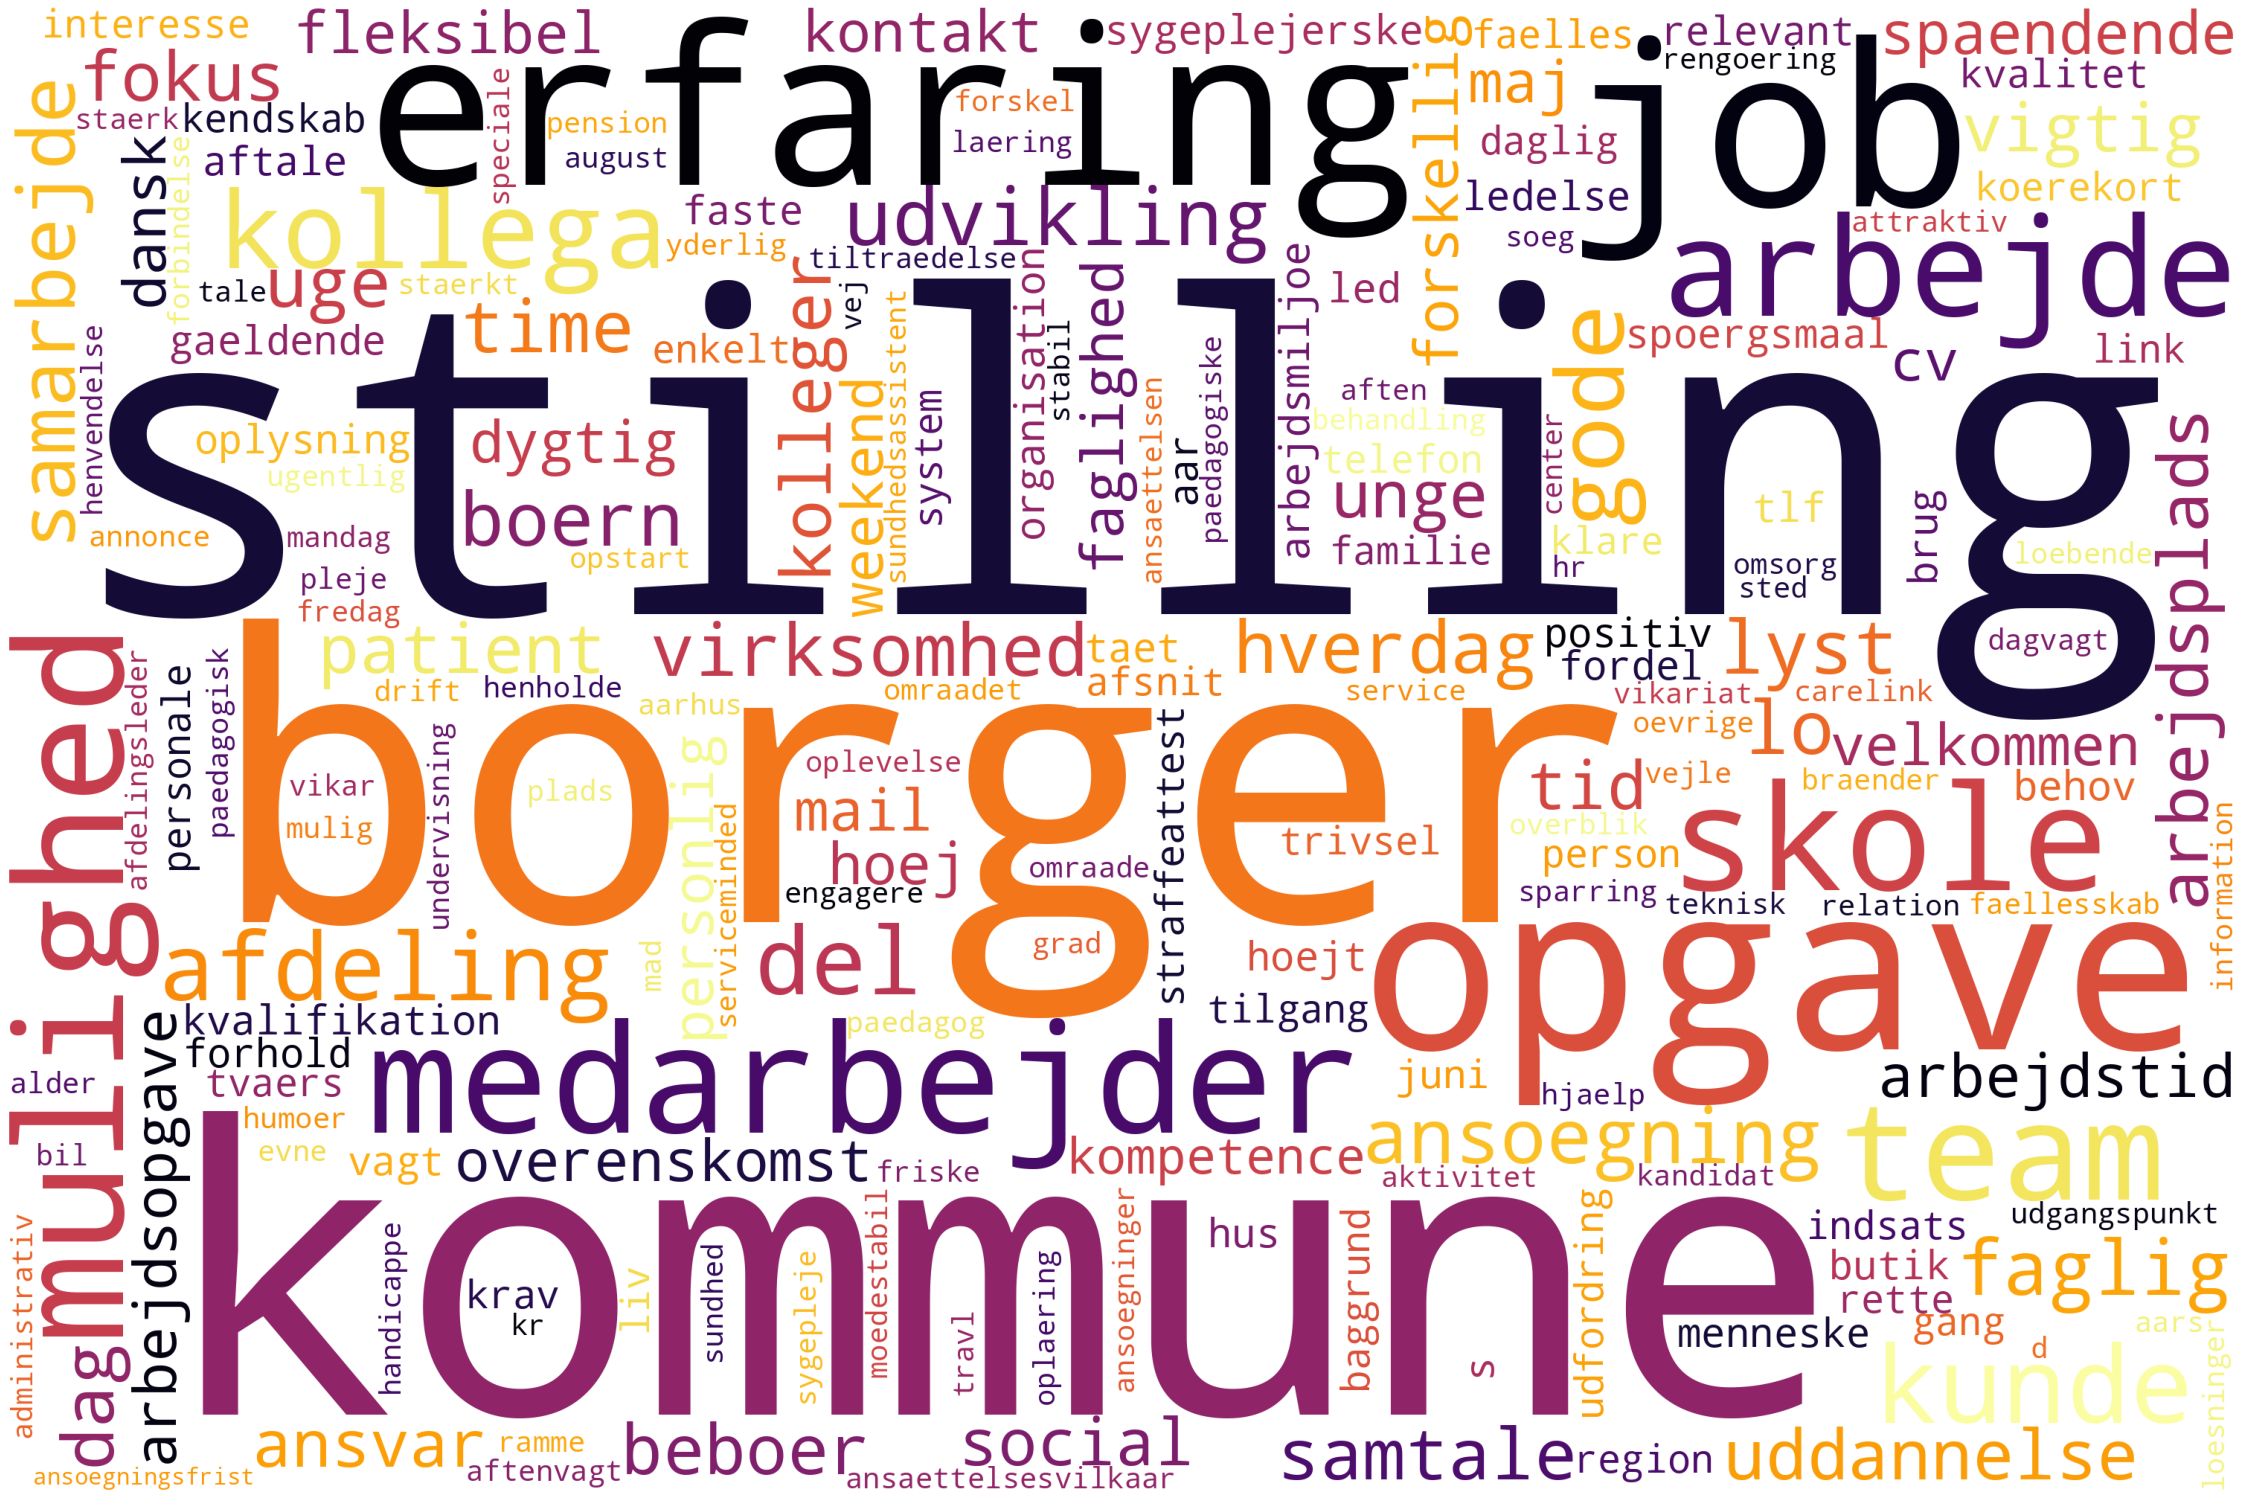

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('unigrams_wordcloud')

In [23]:
from collections import Counter

counts = Counter(lemma for post in df['nn_adj_lemmas'] for lemma in set(post))
freq = pd.DataFrame(counts.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
freq

,word,frequency
156,stilling,312
89,erfaring,257
160,ansoegning,251
9,mulighed,246
4,del,234
...,...,...
5578,holst,1
5577,topmotiveret,1
5576,tilst,1
793,monteringshal,1


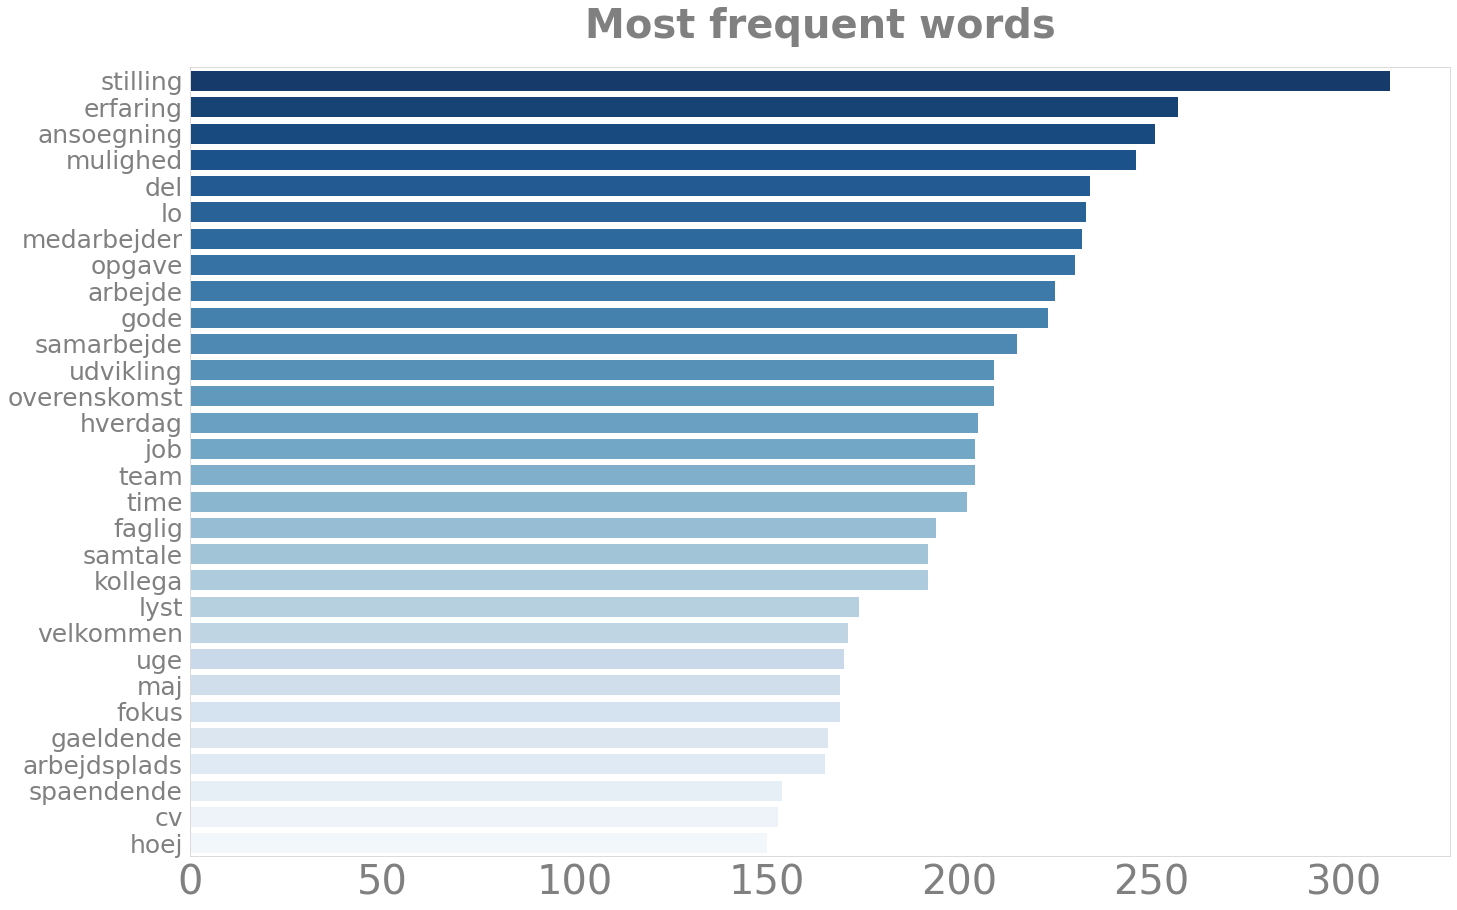

In [29]:


import seaborn as sns





plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 


fig, axes = plt.subplots(figsize=(25,15))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax = sns.barplot(x='frequency',y='word', palette = "Blues_r", data=freq.head(30))  

ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words", fontweight="bold", size=40, y=1.03)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)


ax.set(xlabel="", ylabel = "")

plt.savefig("../../figs/count.pdf")

In [30]:
import ast
from nltk.util import bigrams
import itertools
import collections
import networkx as nx

In [ ]:
terms_bigram = []

for post in df['nn_ad']:
    tokens = [token for token in ast.literal_eval(tweet) if token not in my_stop_words]
    terms_bigram.append(list(bigrams(tokens)))

# terms_bigram = [list(bigrams(ast.literal_eval(tweet))) for tweet in df['tokens_list']]
# Flatten list of bigrams in clean tweets
bigrms = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrms)
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])